# APS 2 – ANÁLISE DA DIFUSÃO DE UM POLUENTE EM UM RIO COM CORRENTEZA

### Grupo 10 - Matheus Castellucci, Pedro Gomes, João Pedro dos Santos

In [305]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

Esses são os parâmetros que modelam o sistema:

<img src = "imgs/Funcao1.png">

Como trata-se de um sistema de difusão de poluentes no rio, devemos usar a mesma equação para a difusão de calor. 
<img src = "imgs/Funcao2.png">

Esses são os objetivos que devem ser respondidos com a APS: 
<img src = "imgs/Tarefas.png">

## Tarefa 1 (2,0 pontos):
### Substitua as derivadas da equação de Burgers pelas aproximações de diferenças finitas. Use diferença central para as derivadas em X e Y e diferença avançada para a derivada no tempo
![Alt text](imgs/tarefa1_feita.jpeg)

## Tarefa 2:
### (2,0 pontos): Manipule algebricamente a equação obtida no item “a” e encontre a expressão da concentração em um ponto genérico (x, y) no instante futuro t + 1 em função das concentrações no instante atual t
![Alt text](imgs//tarefas2e3_feitas.jpeg)

## Tarefa 3:

In [306]:
#Dados do problema
K = 1 #m²/s
alpha = 1 #m/s
T = 3 #s
Q_ponto = 100 #kg/ms
Lx = 30 #m
Ly = 20 #m
Tempo_total = 10*T #s

#Ponto de solta do poluente
n = 10 #número do grupo
a = n/1.4
b = (60/(n+5))

In [307]:
#Contornos do problema

#Contorno A
#   delta_t/delta_s² < 1/4*K
#   delta_t/delta_s² < 0.25
#delta_x = delta_y = delta_s
delta_s = 1 #m
divisor = 1.5 #numero necessario para fazer que a condição de contorno seja satisfeita (sempre deixar maior que 1)
delta_t = (0.25*delta_s**2)/divisor
# delta_t = (delta_s**2)/4*K
# delta_t = (0.25 * delta_s ** 2) / (4 * K)

In [308]:
x = int(Lx/delta_s) + 1
y = int(Ly/delta_s) + 1

V = alpha*sin(pi*x/5)

C = np.zeros((x, y))

tempo = np.arange(0, Tempo_total, delta_t)
Cf = C.copy()
Cp = C.copy()
Erro = np.zeros((x, y))

In [309]:
#lembrando que o i é a coluna e o j é a linha -> No enunciado está invertido

for t in range(1, len(tempo)):
    for i in range(0, y-1):    
        for j in range(0, x-1):
            v_xy = alpha*sin((pi/5)*j)

            termo4 = K*((Cp[j+1][i] + Cp[j-1][i] - 4*Cp[j][i] + Cp[j][i+1] + Cp[j][i-1])/delta_s**2)
            termo3 = v_xy*((Cp[j][i+1] - Cp[j][i-1])/(2*delta_s))
            termo2 = alpha*((Cp[j+1][i] - Cp[j-1][i])/(2*delta_s))
            
            if (j == int(a) and i == b) and t < T:
                termo1 = (Q_ponto)/(delta_s**2)
                Cp[j][i] = (Cp[j][i] + delta_t*(termo1 - termo2 - termo3 + termo4))

            else:
                Cp[j][i] = (Cp[j][i] + delta_t*(termo2 - termo3 + termo4))
            
            if Cp[j][i] < 0:

                Cp[j][i] = 0

    Cf = Cp.copy()
    Cf[0][:] = Cf[1][:]
    Cf[:][0] = Cf[:][1]
    Cf[x-1][:] = Cf[x-2][:]
    Cf[:][y-1] = Cf[:][y-2]


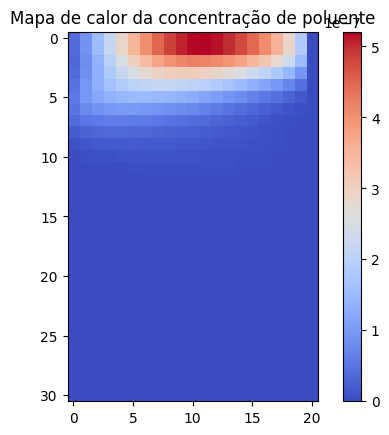

In [310]:
#plotar o gráfico como um mapa de calor
plt.title('Mapa de calor da concentração de poluente')
plt.imshow(Cf, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.show()

## Tarefa 4:

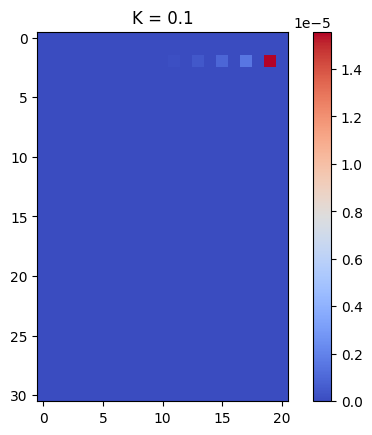

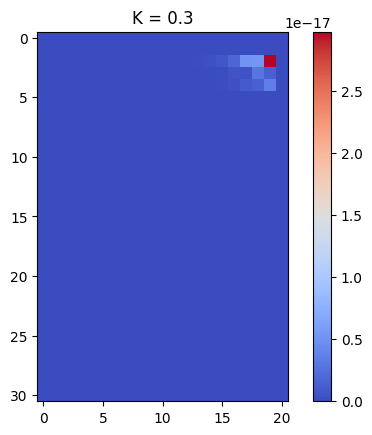

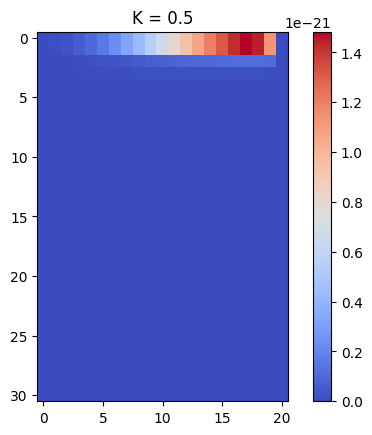

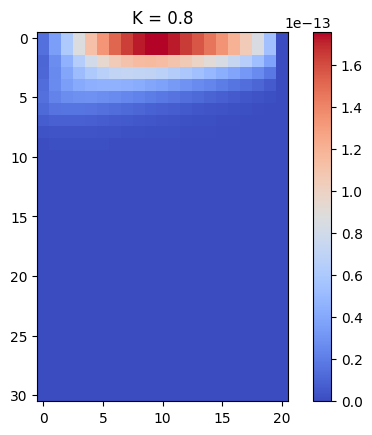

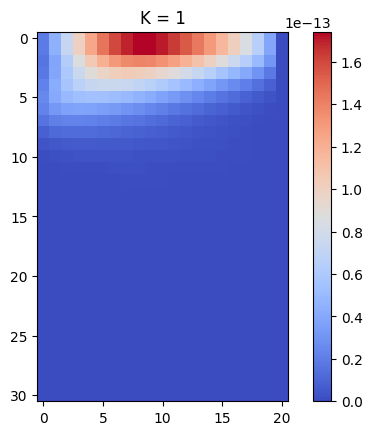

In [313]:
lista_k = [0.1, 0.3, 0.5, 0.8, 1]

C = np.zeros((x, y))

for K in lista_k:
    for t in range(1, len(tempo)):
        for i in range(0, y-1):    
            for j in range(0, x-1):
                v_xy = alpha*sin((pi/5)*j)

                termo4 = K*((Cp[j+1][i] + Cp[j-1][i] - 4*Cp[j][i] + Cp[j][i+1] + Cp[j][i-1])/delta_s**2)
                termo3 = v_xy*((Cp[j][i+1] - Cp[j][i-1])/(2*delta_s))
                termo2 = alpha*((Cp[j+1][i] - Cp[j-1][i])/(2*delta_s))
                
                if (j == int(a) and i == b) and t < T:
                    termo1 = (Q_ponto)/(delta_s**2)
                    Cp[j][i] = (Cp[j][i] + delta_t*(termo1 - termo2 - termo3 + termo4))

                else:
                    Cp[j][i] = (Cp[j][i] + delta_t*(termo2 - termo3 + termo4))
                
                if Cp[j][i] < 0:

                    Cp[j][i] = 0

        Cf = Cp.copy()
        Cf[0][:] = Cf[1][:]
        Cf[:][0] = Cf[:][1]
        Cf[x-1][:] = Cf[x-2][:]
        Cf[:][y-1] = Cf[:][y-2]
    plt.title('K = ' + str(K))
    plt.imshow(Cf, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.show()